In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')


d:\Anaconda\envs\cursito\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_argentina_pivot = pd.read_csv("df_argentina_pivot.csv")


In [3]:
df_ar_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

df_ar_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [13]:
df_argentina_pivot['job_posted_month'] = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_argentina_pivot.set_index('job_posted_month', inplace=True)
df_argentina_pivot
df_argentina_pivot.merge(df_ar_software_pivot, on='job_posted_month')
df_argentina_pivot
df_merged = df_argentina_pivot.merge(df_ar_software_pivot, on='job_posted_month')
df_argentina_pivot

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,50,52,117,167,131,22,24,45,38,202
February,15,8,68,98,67,19,13,28,10,46
March,19,11,58,150,85,17,9,47,21,61
April,38,7,79,175,86,16,19,46,21,51
May,17,3,39,91,56,10,8,46,9,34
June,18,10,75,156,114,20,11,35,22,27
July,37,25,138,195,207,35,32,46,41,91
August,58,62,219,292,256,40,59,97,60,224
September,49,33,141,228,163,19,20,50,37,119


In [17]:
top_4 = (
    df_merged
    .sum()
    .sort_values(ascending=False)
    .head(4)
    .index # get index of the top 5
    .tolist())
top_4

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer']

<Axes: xlabel='job_posted_month'>

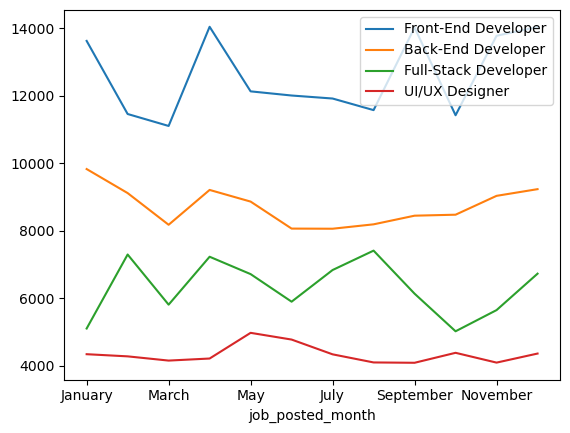

In [18]:
df_merged[top_4].plot(kind='line')